In [1]:
from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import random
import pandas as pd
img_path = 'img/000000_image.jpg'
gt_path = 'img/000000.png'

In [5]:
total_df = pd.read_pickle('../pickles/uav_train_sfcn_10000_5_train.pickle')
first = total_df[total_df['id']=='Images_seq1_000000']

In [6]:
rgb = np.array(first['feature'])
rgb = rgb[0][:,:3]
label_gt = np.array(first['label_gt'])
label_gt= label_gt[0]
print(len(label_gt))

33759


In [27]:
color_map = []
for label in label_gt :
    if label == 0 :
        color_map.append('black') #ok
    elif label == 1 :
        color_map.append('red') #ok
    elif label == 2 :
        # color_map.append('gray')
        color_map.append('#804080')
    elif label == 3 :
        color_map.append('#C933C9') 
    elif label == 4 :
        color_map.append('green') #ok
    elif label == 5 :
        color_map.append('yellow') #ok
    elif label == 6 :
        # color_map.append('blue')
        color_map.append('#404000')
    elif label == 7 :
        color_map.append('blue')
print(len(color_map))

33759


In [28]:
rgb_dict = dict(enumerate(rgb))
new_array = np.zeros((2160, 3840,3), dtype=object)
new_array.shape

(2160, 3840, 3)

In [29]:
df = pd.read_csv('map_csv/000000_image.csv', header=None)

In [30]:
for i, row in df.iterrows():
    for j in range(len(row)) :
        
        new_array[i][j] = rgb_dict[row[j]-1].astype(float)


In [31]:
segment_image = new_array.astype(float)/255
segments_0 = np.array(df)-1
img_0 = imread(img_path)
gt_origin_0 = imread(gt_path)
gt_0 = gt_origin_0[:,:,:3]
# segments = np.array(df) 
# img = imread(img_path)
# gt_origin = imread(gt_path)
# gt = gt_origin[:,:,:3]

In [32]:
# x = 980
# y = 2150
# w = 250
# h = 250

w = 350
h = 350
x = random.randrange(w, 2100-w)
y = random.randrange(h, 3800-h)
print(x, y)
x = 1048 
y = 1373
# x = 1715
# y = 1600

img = img_0[x:x+w, y:y+h,:]
gt_origin = gt_origin_0[x:x+w, y:y+h,:]
gt = gt_0[x:x+w, y:y+h,:]
segments = segments_0[x:x+w, y:y+h]
crop_segment = segment_image[x:x+w, y:y+h]
# segments1 = segments_0[x:x+w, y:y+h]
# segments = segments1

asegments = np.array(segments)
segments_ids = np.unique(segments)

# # # # centers
centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(segments_ids)
label_dict = dict(zip(list(segments_ids),list(labels)))
revers_label = {v:k for k,v in label_dict.items()}
node_color = dict()
for i in range(len(segments_ids)):
    node_color[i] = rgb_dict[revers_label[i]]/255
print(len(node_color))
cmaps = pd.Series(node_color)
label_gt_node = dict()
for i in range(len(segments_ids)):
    label_gt_node[i] = color_map[revers_label[i]]
gt_cmaps = pd.Series(label_gt_node)
new_seg = np.vectorize(label_dict.get)(segments)  # don't touch

937 2246
570


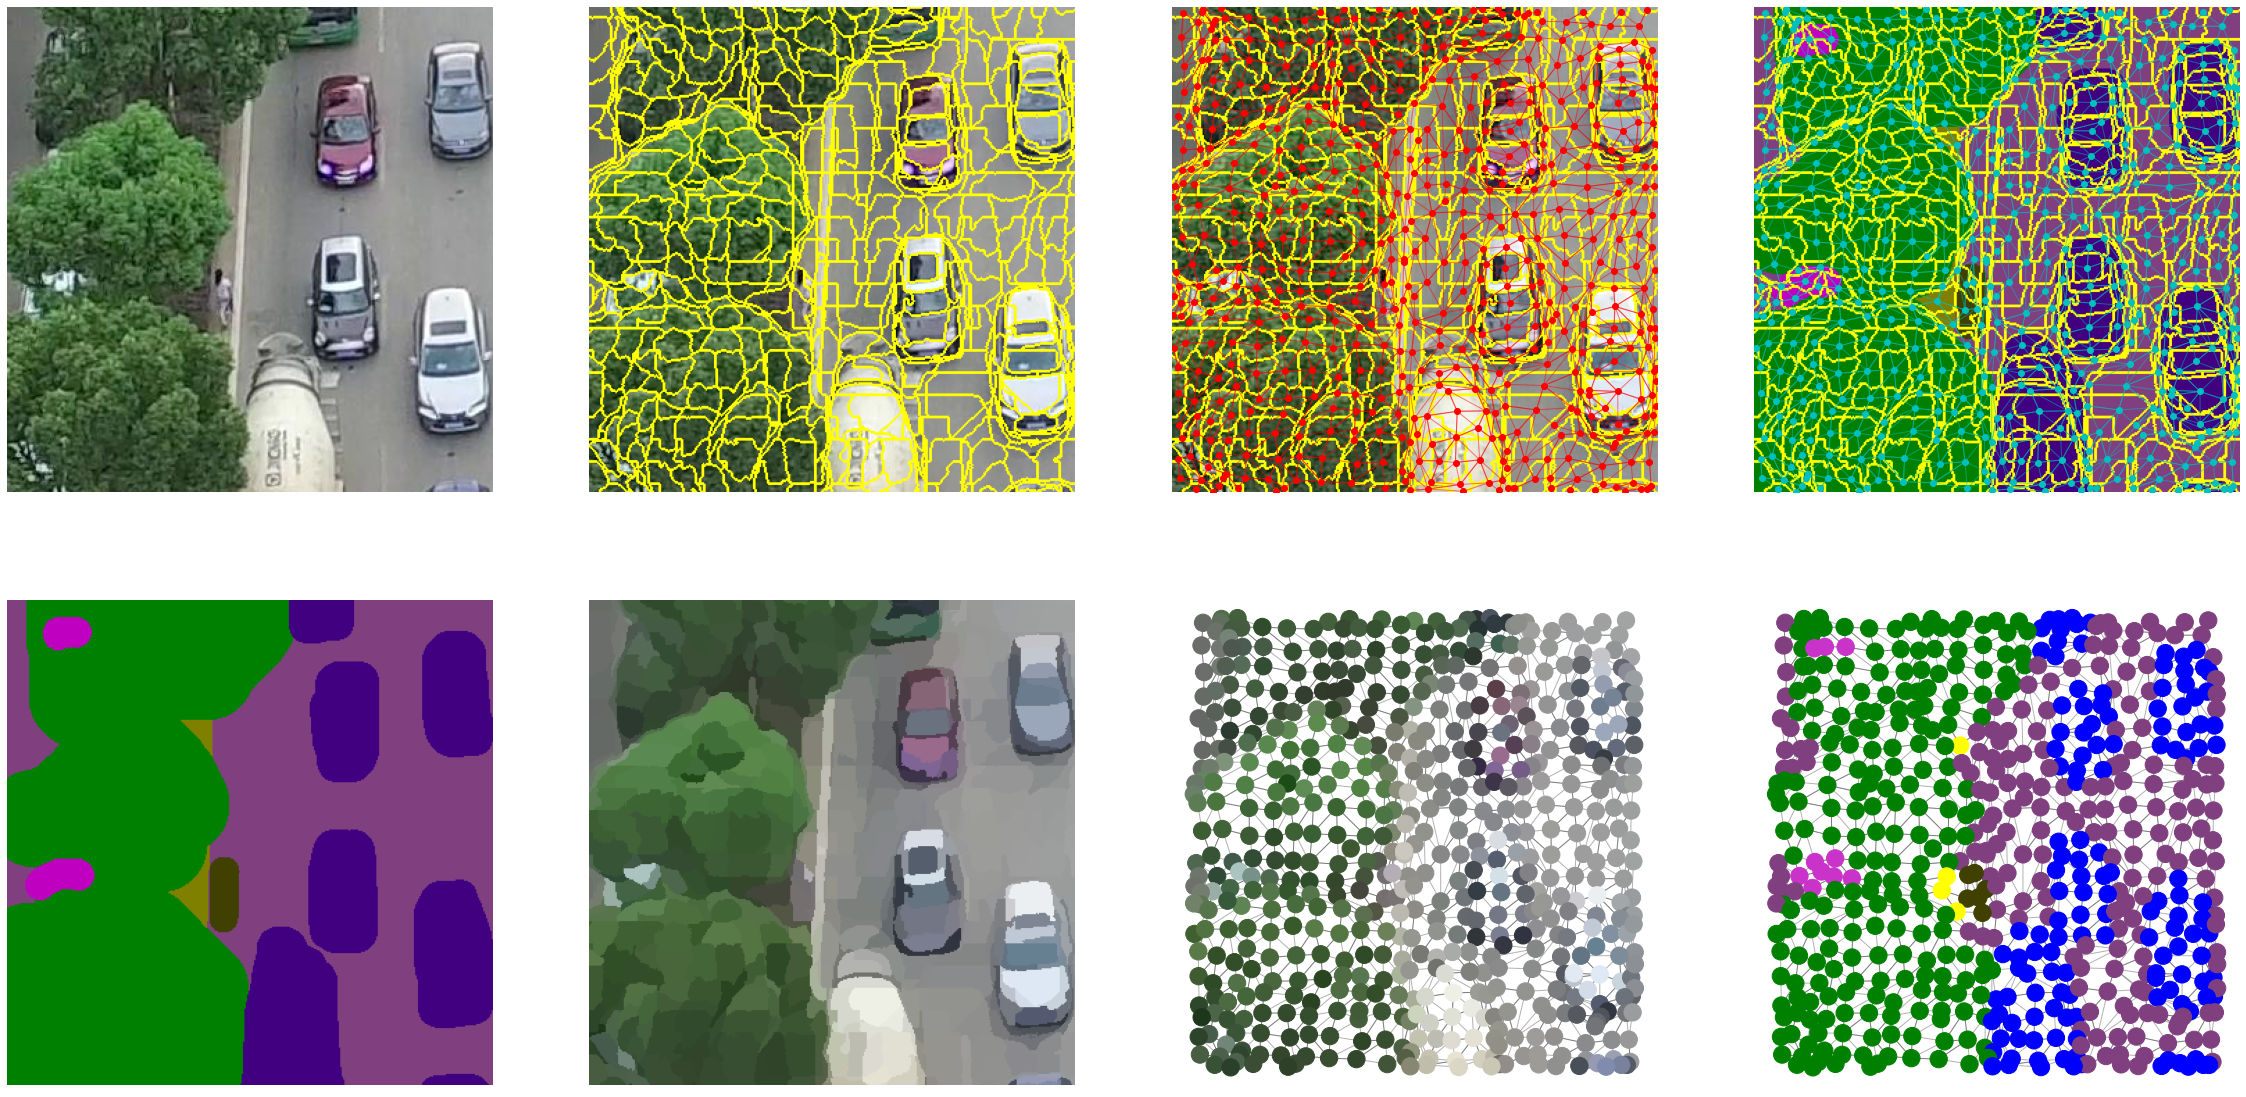

In [33]:
fig = plt.figure(figsize=(40,20))
row = 2
col = 4

ax0 = fig.add_subplot(row, col, 1)
ax1 = fig.add_subplot(row, col, 2)
ax2 = fig.add_subplot(row, col, 3)
ax3 = fig.add_subplot(row, col, 4)
ax4 = fig.add_subplot(row, col, 5)
ax5 = fig.add_subplot(row, col, 6)
ax6 = fig.add_subplot(row, col, 7)
ax7 = fig.add_subplot(row, col, 8)
ax0.imshow(img, cmap="gray")
ax1.imshow(mark_boundaries(img, segments), cmap="gray")
ax2.imshow(mark_boundaries(img, segments), cmap="gray")
ax3.imshow(mark_boundaries(gt, segments), cmap="gray")
ax4.imshow(gt_origin)
ax5.imshow(crop_segment)

vs_right = np.vstack([new_seg[:,:-1].ravel(), new_seg[:,1:].ravel()])
vs_below = np.vstack([new_seg[:-1,:].ravel(), new_seg[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)
ax2.scatter(centers[:,1],centers[:,0], c='r')
ax3.scatter(centers[:,1],centers[:,0], c='c')


for i in range(bneighbors.shape[1]):

    y0,x0 = centers[bneighbors[0,i]]
    y1,x1 = centers[bneighbors[1,i]]
    
    l = Line2D([x0,x1],[y0,y1], c="r", alpha=0.5,linewidth =1)
    l2 = Line2D([x0,x1],[y0,y1], c="c", alpha=0.5,linewidth =1)
    l3 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    l4 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    ax2.add_line(l)
    ax3.add_line(l2)
    ax6.add_line(l3)
    ax7.add_line(l4)
ax6.scatter(centers[:,1],centers[:,0], c=cmaps, s= 300, alpha=1, zorder=502)    
ax7.scatter(centers[:,1],centers[:,0], c=gt_cmaps, s= 300, alpha=1, zorder=502)    
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')

ax6.invert_yaxis()
ax7.invert_yaxis()


# plt.show()
plt.savefig('superpixel_graph.png',bbox_inches="tight")

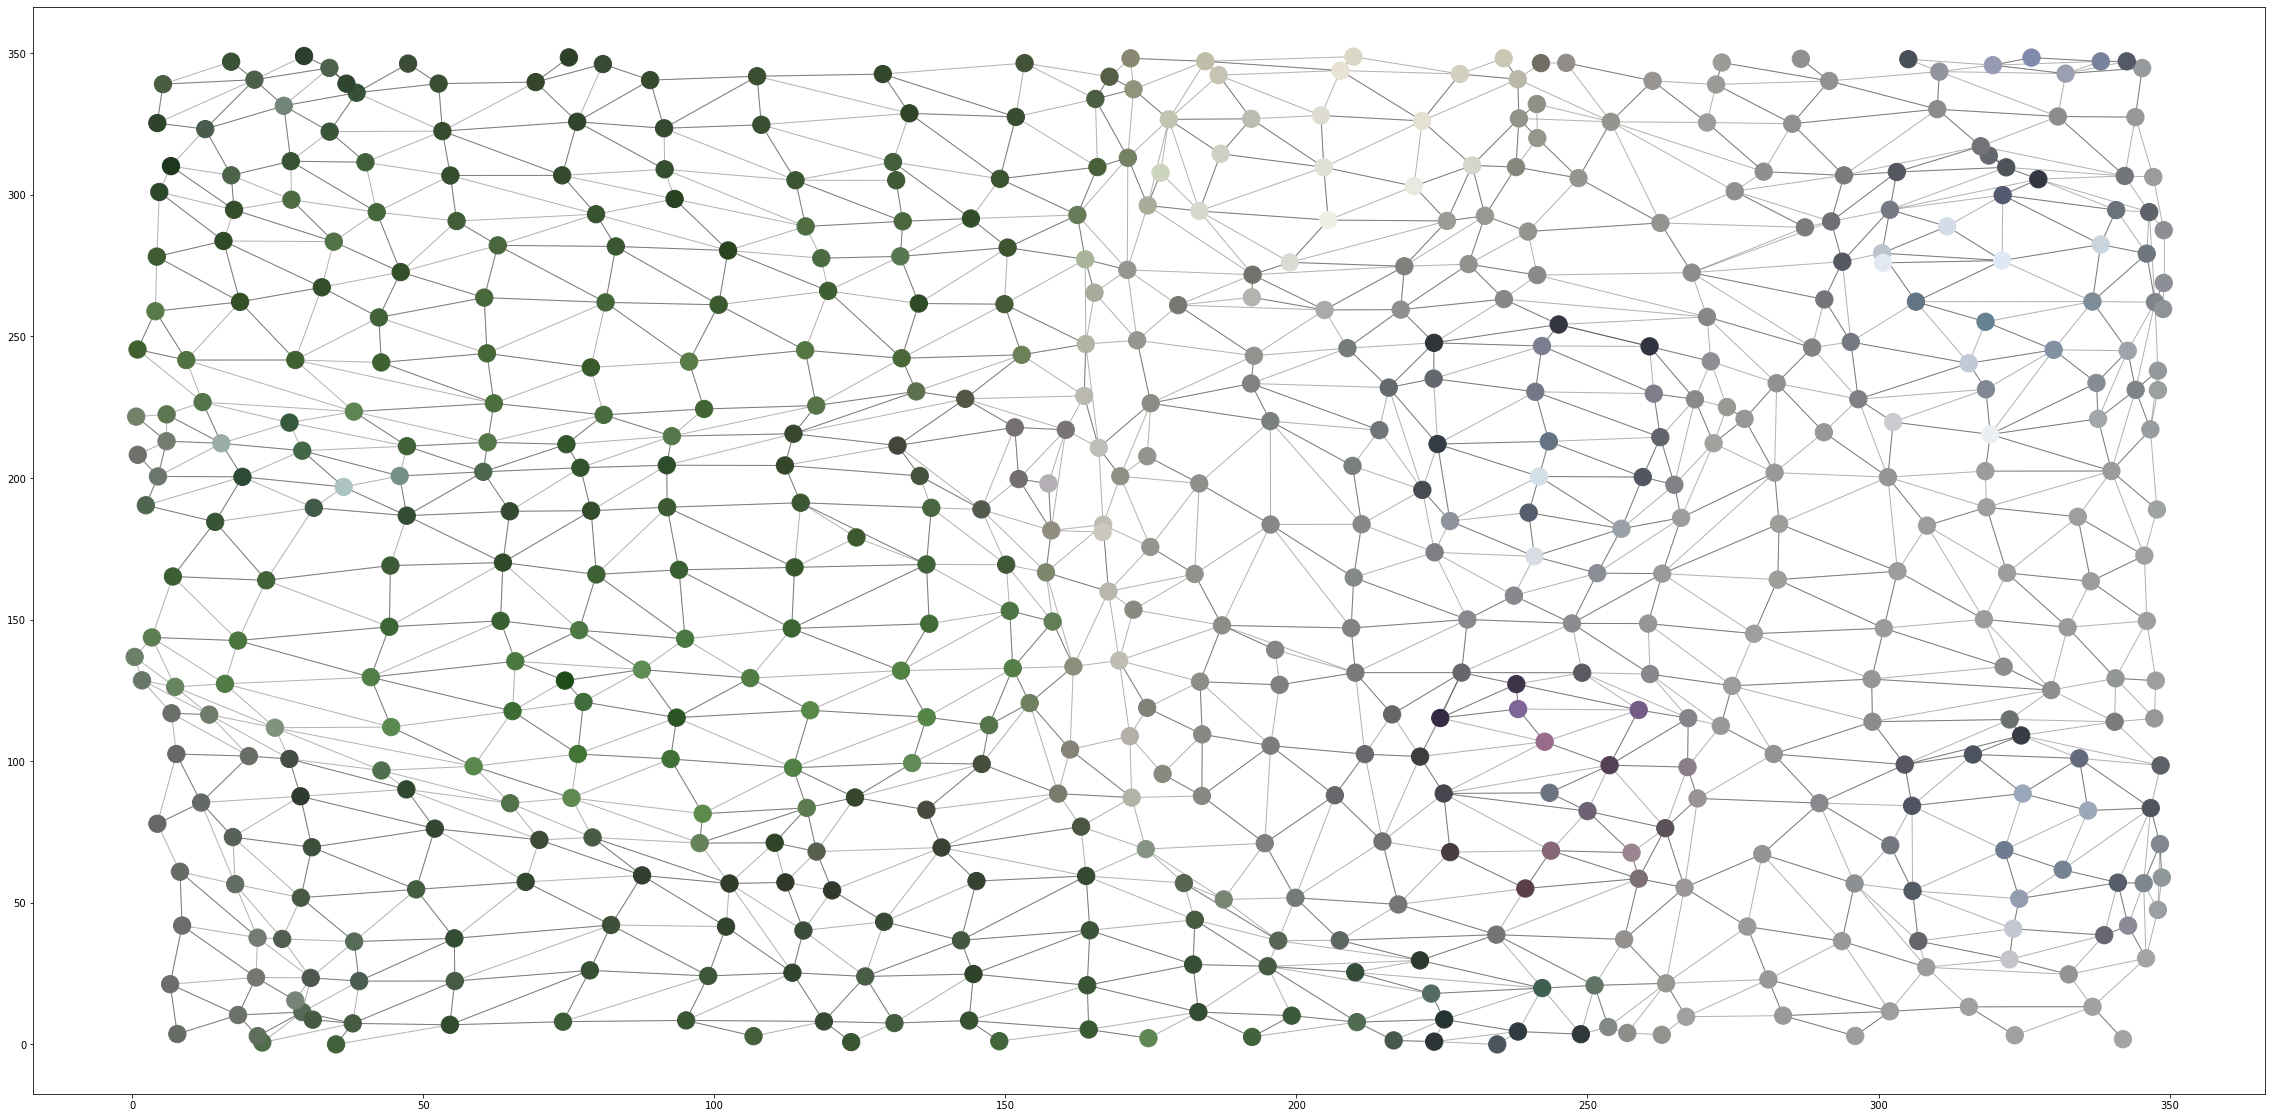

In [26]:
from skimage.io import imshow
fig = plt.figure(figsize=(40,20))
row = 1
col = 1

ax0 = fig.add_subplot(row, col, 1)
# imshow(img)
# ax0.imshow(mark_boundaries(img, segments), cmap="gray")
# # imshow(mark_boundaries(gt, segments), cmap="gray")
# imshow(gt_origin)
# # imshow(crop_segment)

vs_right = np.vstack([new_seg[:,:-1].ravel(), new_seg[:,1:].ravel()])
vs_below = np.vstack([new_seg[:-1,:].ravel(), new_seg[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)
# ax0.scatter(centers[:,1],centers[:,0], c='r')
# # ax3.scatter(centers[:,1],centers[:,0], c='c')


for i in range(bneighbors.shape[1]):

    y0,x0 = centers[bneighbors[0,i]]
    y1,x1 = centers[bneighbors[1,i]]
    
    l = Line2D([x0,x1],[y0,y1], c="r", alpha=0.5,linewidth =1)
    l2 = Line2D([x0,x1],[y0,y1], c="c", alpha=0.5,linewidth =1)
    l3 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    ax0.add_line(l3)
ax0.scatter(centers[:,1],centers[:,0], c=cmaps, s= 300, alpha=1, zorder=502)    
# ax7.scatter(centers[:,1],centers[:,0], c=gt_cmaps, s= 300, alpha=1, zorder=502)    
# ax0.axis('off')
# ax0.invert_yaxis()


plt.savefig('pic5.png')